In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

academic_performance = pd.read_csv('enhanced_student_habits_performance_dataset.csv')

# Aplicar estandarización a la asistencia (%)
scaler_std = StandardScaler()

# fit: calcula la media y desviacion de cada columna
# transform: aplica un formula para centrar los datos en 0 con varianza a 1
academic_performance['attendance_percentage_std'] = scaler_std.fit_transform(academic_performance[['attendance_percentage']])

academic_performance['study_hours_per_screen_time_hours_ratio'] = academic_performance['study_hours_per_day'] / academic_performance['screen_time']
academic_performance['study_hours_per_motivation_level_ratio'] = academic_performance['study_hours_per_day'] / academic_performance['motivation_level']

# variables predictoras
X = academic_performance[['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage_std', 'sleep_hours',
                        'exercise_frequency', 'mental_health_rating', 'previous_gpa', 'stress_level', 'social_activity', 'screen_time',
                        'motivation_level', 'exam_anxiety_score', 'time_management_score', 'study_hours_per_screen_time_hours_ratio',
                        'study_hours_per_motivation_level_ratio']]
y = academic_performance['exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)

y_pred = modelo_rl.predict(X_test)

In [32]:
# calcular metricas de evaluacion
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# calcular metricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE (Error cuadratico medio): {mse:.2f}')
print(f'RMSE (Raiz del Error cuadratico medio): {rmse:.2f}')
print(f'MAE (Error absoluto medio): {mae:.2f}')
print(f'R^2 (Coeficiente de determinacion): {r2:.2f}')

MSE (Error cuadratico medio): 17.54
RMSE (Raiz del Error cuadratico medio): 4.19
MAE (Error absoluto medio): 3.20
R^2 (Coeficiente de determinacion): 0.87


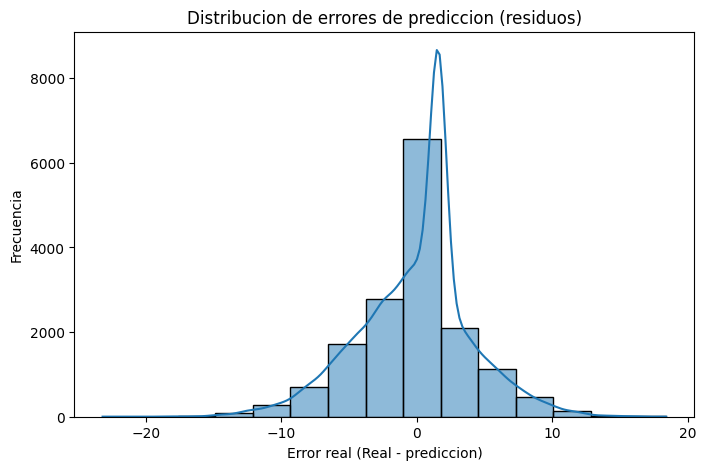

In [33]:
# visualizar errores o residuos
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(y_test - y_pred, bins=15, kde=True)
plt.title('Distribucion de errores de prediccion (residuos)')
plt.xlabel('Error real (Real - prediccion)')
plt.ylabel('Frecuencia')
plt.show()